A notebook to test and demonstrate the `MMD test` of Gretton et al., 2012 used as a goodness-of-fit test. Require the ability to sample from the density `p`.

In [106]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import freqopttest.tst as tst
import kgof
import kgof.data as data
import kgof.density as density
import kgof.goftest as gof
import kgof.mmd as mgof
import kgof.kernel as ker
import kgof.util as util
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
seed = 13
d = 2
alpha = 0.05

mean = np.zeros(d)
variance = 1

In [108]:
p = density.IsotropicNormal(mean, variance)
q_mean = mean.copy()
q_variance = variance
ds = data.DSIsotropicNormal(q_mean+0.2, q_variance)


In [109]:
def gen_pvalue_func():
    nlist = [100,120,140,160, 180]
    p_value_mmd = []
    p_value_ksd = []
    for n in nlist:
        dat = ds.sample(n, seed=seed)
        X = dat.data()
        sig2 = util.meddistance(X, subsample=1000)**2
        k = ker.KGauss(sig2)
        
        bootstrapper = gof.bootstrapper_rademacher 
        kstein = gof.KernelSteinTest(p, k, bootstrapper=bootstrapper, alpha=alpha, n_simulate=n, seed=seed+2)
        kstein_result = kstein.perform_test(dat, return_simulated_stats=True,  return_ustat_gram=True) 
        p_value_ksd.append(kstein_result['pvalue'])
        
        mmd_test = mgof.QuadMMDGof(p, k, n_permute=n, alpha=alpha, seed=seed+2)
        mmd_result = mmd_test.perform_test(dat)
        p_value_mmd.append(mmd_result['pvalue'])
        
    return p_value_mmd, p_value_ksd

[0.91, 0.925, 0.7785714285714286, 0.46875, 0.2]
[0.08, 0.25, 0.1357142857142857, 0.03125, 0.0]


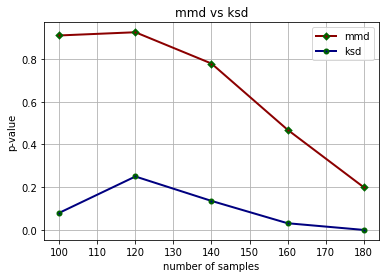

In [110]:
fig, ax = plt.subplots() # 创建图实例 
nsampe_x = np.array([100, 120,140,160,180]) 
#p_value_mmd = np.array([0.91, 0.93, 0.77, 0.48, 0.22])
#p_value_ksd = np.array([0.08, 0.21, 0.13, 0.05, 0.0]) 
(p_value_mmd, p_value_ksd) = gen_pvalue_func()
print(p_value_mmd)
print(p_value_ksd)
ax.plot(nsampe_x, p_value_mmd, label='mmd', color='darkred', linestyle='-', linewidth=2, marker='D', markeredgecolor='darkgreen', markersize='4', markeredgewidth=2)
ax.plot(nsampe_x, p_value_ksd, label='ksd', color='navy', linestyle='-', linewidth=2, marker='o', markeredgecolor='darkgreen', markersize='4', markeredgewidth=2) 

ax.set_xlabel('number of samples') #设置x轴名称 x label 
ax.set_ylabel('p-value') #设置y轴名称 y label 
ax.set_title('mmd vs ksd') #设置图名为Simple Plot 
#ax.set_xticks(np.arange(100, 180, 20), fontsize=tick_font)  
#ax.set_yticks(np.arange(0, 1, 0.1), fontsize=tick_font) 
ax.legend() #自动检测要在图例中显示的元素，并且显示  
ax.grid(True)
plt.show() #图形可视 